In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
sc = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
sc

In [5]:
spark_df = sc.read.csv('C:/Users/Administrator/Downloads/owid-covid-data.csv', header=True)

spark_df.show(5)

+--------+---------+-----------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+---------+-----------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+-------------------------------------+----------------+----------+------------------+----------+-------------+-------------+--------------+---

In [6]:
spark_df.filter('location like "U%"').select("location").distinct().show()

+--------------------+
|            location|
+--------------------+
|       United States|
|             Ukraine|
|             Uruguay|
| Upper middle income|
|              Uganda|
|United Arab Emirates|
|          Uzbekistan|
|      United Kingdom|
+--------------------+



In [7]:
spark_df.createOrReplaceTempView("covid")

sc.sql('SELECT DISTINCT(location) FROM covid WHERE location LIKE "U%"').show()

+--------------------+
|            location|
+--------------------+
|       United States|
|             Ukraine|
|             Uruguay|
| Upper middle income|
|              Uganda|
|United Arab Emirates|
|          Uzbekistan|
|      United Kingdom|
+--------------------+



In [8]:
spark_df_uk = sc.sql('SELECT * FROM covid WHERE location = "United Kingdom"')

spark_df_uk.show()

+--------+---------+--------------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+---------+-----------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+-------------------------------------+----------------+----------+------------------+----------+-------------+-------------+--------------+

In [9]:
pandas_df = spark_df_uk.toPandas()

pandas_df.head()

iso_code continent        location        date total_cases new_cases  \
0      GBR    Europe  United Kingdom  2020-01-31         2.0       2.0   
1      GBR    Europe  United Kingdom  2020-02-01         2.0       0.0   
2      GBR    Europe  United Kingdom  2020-02-02         2.0       0.0   
3      GBR    Europe  United Kingdom  2020-02-03         8.0       6.0   
4      GBR    Europe  United Kingdom  2020-02-04         8.0       0.0   

  new_cases_smoothed total_deaths new_deaths new_deaths_smoothed  ...  \
0               None         None       None                None  ...   
1               None         None       None                None  ...   
2               None         None       None                None  ...   
3               None         None       None                None  ...   
4               None         None       None                None  ...   

  gdp_per_capita extreme_poverty cardiovasc_death_rate diabetes_prevalence  \
0      39753.244             0.2               122.137                4.28   
1      39753.244             0.2               122.137                4.28   
2      39753.244             0.2               122.137                4.28   
3      39753.244             0.2               122.137                4.28   
4      39753.244             0.2               122.137                4.28   

  female_smokers male_smokers handwashing_facilities  \
0           20.0         24.7                   None   
1           20.0         24.7                   None   
2           20.0         24.7                   None   
3           20.0         24.7                   None   
4           20.0         24.7                   None   

  hospital_beds_per_thousand life_expectancy human_development_index  
0                       2.54           81.32                   0.932  
1                       2.54           81.32                   0.932  
2                       2.54           81.32                   0.932  
3                       2.54           81.32                   0.932  
4                       2.54           81.32                   0.932  

[5 rows x 59 columns]

We can now use pandas features

In [13]:
import pandas as pd

pandas_df.dtypes

pandas_df['new_cases'] = pd.to_numeric(pandas_df['new_cases'])
pandas_df['date'] = pd.to_datetime(pandas_df['date'])

pandas_df.set_index('date', inplace=True)

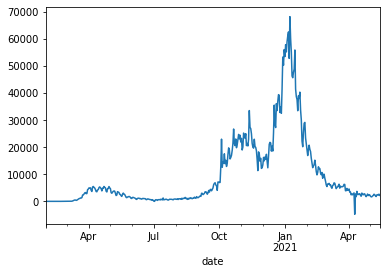

In [14]:
%matplotlib inline

pandas_df['new_cases'].plot()